<a href="https://colab.research.google.com/github/myra349/vistarnetra/blob/main/ATTENDANCE_ANALTYICS_ENGINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime


In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# -----------------------------
# CONFIG
# -----------------------------
num_students = 100
num_faculty = 12
num_days = 30            # 1 month
periods = list(range(1, 9))   # 8 periods per day
subjects = ["Maths", "DSA", "AI", "Python", "DBMS", "OS", "ML", "Cloud"]

# -----------------------------
# ID GENERATION
# -----------------------------
students = [f"S{1000+i}" for i in range(num_students)]
faculty = [f"F{200+i}" for i in range(num_faculty)]

start_date = datetime(2025, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(num_days)]

rows = []

# -----------------------------
# MAIN GENERATION LOOP
# -----------------------------
for date in dates:
    for sid in students:
        for period in periods:

            row = {
                "student_id": sid,
                "faculty_id": random.choice(faculty),
                "date": date.strftime("%Y-%m-%d"),
                "period": period,
                "subject": random.choice(subjects),
                "status": random.choice(["present","present","absent"]),
                "late": random.choice(["yes","no","no"])
            }
            rows.append(row)

# -----------------------------
# DATAFRAME
# -----------------------------
df = pd.DataFrame(rows)
df.to_csv("student_100_attendance.csv", index=False)

df.head(20)


,student_id,faculty_id,date,period,subject,status,late
0,S1000,F200,2025-01-01,1,Cloud,present,no
1,S1000,F202,2025-01-01,2,OS,absent,no
2,S1000,F201,2025-01-01,3,AI,present,no
3,S1000,F202,2025-01-01,4,Python,present,no
4,S1000,F200,2025-01-01,5,Maths,absent,yes
5,S1000,F206,2025-01-01,6,Python,present,no
6,S1000,F201,2025-01-01,7,DBMS,absent,no
7,S1000,F205,2025-01-01,8,Cloud,present,no
8,S1001,F201,2025-01-01,1,DSA,present,yes
9,S1001,F202,2025-01-01,2,DBMS,present,no


In [ ]:
# Create a fixed timetable: 8 periods → 8 subjects
day_timetable = {
    1: "Maths",
    2: "DSA",
    3: "AI",
    4: "Python",
    5: "DBMS",
    6: "OS",
    7: "ML",
    8: "Cloud"
}


In [ ]:
subject_faculty_map = {}
for i, subject_name in enumerate(subjects):
    subject_faculty_map[subject_name] = faculty[i] # Assign F200 to Maths, F201 to DSA, etc.

rows = []

start_date = datetime(2025, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(num_days)]

for date in dates:

    weekday = date.weekday()  # Monday=0, Sunday=6

    for sid in students:
        for period in periods:

            subject = day_timetable[period]
            fid = subject_faculty_map[subject]

            # Attendance probability changes by weekday
            if weekday == 4:  # Friday
                status = np.random.choice(["present","absent"], p=[0.70, 0.30])
            elif weekday == 0:  # Monday
                status = np.random.choice(["present","absent"], p=[0.75, 0.25])
            else:
                status = np.random.choice(["present","absent"], p=[0.85, 0.15])

            # Late probability
            late = np.random.choice(["yes","no"], p=[0.15, 0.85])

            rows.append([
                sid,
                fid,
                date.strftime("%Y-%m-%d"),
                subject,
                period,
                status,
                late
            ])

df = pd.DataFrame(rows, columns=[
    "student_id","faculty_id","date","subject","period","status","late"
])

df.to_csv("realistic_attendance_100_students.csv", index=False)
df.head(20)


,student_id,faculty_id,date,subject,period,status,late
0,S1000,F200,2025-01-01,Maths,1,present,no
1,S1000,F201,2025-01-01,DSA,2,present,yes
2,S1000,F202,2025-01-01,AI,3,present,no
3,S1000,F203,2025-01-01,Python,4,present,no
4,S1000,F204,2025-01-01,DBMS,5,present,no
5,S1000,F205,2025-01-01,OS,6,present,no
6,S1000,F206,2025-01-01,ML,7,present,yes
7,S1000,F207,2025-01-01,Cloud,8,present,no
8,S1001,F200,2025-01-01,Maths,1,present,no
9,S1001,F201,2025-01-01,DSA,2,present,no


In [ ]:
from google.colab import files
files.download("realistic_attendance_100_students.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

df = pd.read_csv("realistic_attendance_100_students.csv")
df["date"] = pd.to_datetime(df["date"])
df["day"] = df["date"].dt.day_name()

df.head()


,student_id,faculty_id,date,subject,period,status,late,day
0,S1000,F200,2025-01-01,Maths,1,present,no,Wednesday
1,S1000,F201,2025-01-01,DSA,2,present,yes,Wednesday
2,S1000,F202,2025-01-01,AI,3,present,no,Wednesday
3,S1000,F203,2025-01-01,Python,4,present,no,Wednesday
4,S1000,F204,2025-01-01,DBMS,5,present,no,Wednesday


In [ ]:
student_attendance = df.groupby("student_id")["status"].apply(lambda x: (x=="present").mean()*100)
student_attendance.head()


,status
student_id,
S1000,84.583333
S1001,80.000000
S1002,80.833333
S1003,82.500000
S1004,80.000000


In [ ]:
faculty_attendance = df.groupby("faculty_id")["status"].apply(lambda x: (x=="present").mean()*100)
faculty_attendance


,status
faculty_id,
F200,82.066667
F201,80.833333
F202,81.033333
F203,82.133333
F204,82.633333
F205,81.433333
F206,83.266667
F207,82.600000


In [ ]:
subject_attendance = df.groupby("subject")["status"].apply(lambda x: (x=="present").mean()*100)
subject_attendance


,status
subject,
AI,81.033333
Cloud,82.600000
DBMS,82.633333
DSA,80.833333
ML,83.266667
Maths,82.066667
OS,81.433333
Python,82.133333


In [ ]:
daywise_pattern = df.groupby("day")["status"].apply(lambda x: (x=="present").mean()*100)
daywise_pattern


,status
day,
Friday,70.43750
Monday,75.81250
Saturday,85.75000
Sunday,84.96875
Thursday,85.90000
Tuesday,84.50000
Wednesday,84.92500


In [ ]:
risk_scores = {}

for sid in df["student_id"].unique():
    sdf = df[df["student_id"]==sid]
    attendance = (sdf["status"]=="present").mean()

    # Friday bunk detection
    fri = (sdf[sdf["day"]=="Friday"]["status"]=="absent").mean()

    # Streak detection
    sdf_sorted = sdf.sort_values("date")
    streak = 0
    max_streak = 0

    for s in sdf_sorted["status"]:
        if s == "absent":
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0

    risk = (1 - attendance)*100
    if fri > 0.40: risk += 7
    if max_streak >= 3: risk += 5

    risk_scores[sid] = min(100, round(risk,2))

risk_scores


{'S1000': np.float64(20.42),
 'S1001': np.float64(20.0),
 'S1002': np.float64(24.17),
 'S1003': np.float64(22.5),
 'S1004': np.float64(25.0),
 'S1005': np.float64(20.0),
 'S1006': np.float64(14.58),
 'S1007': np.float64(25.0),
 'S1008': np.float64(16.67),
 'S1009': np.float64(26.25),
 'S1010': np.float64(20.83),
 'S1011': np.float64(21.67),
 'S1012': np.float64(17.08),
 'S1013': np.float64(25.83),
 'S1014': np.float64(24.17),
 'S1015': np.float64(19.58),
 'S1016': np.float64(16.67),
 'S1017': np.float64(18.33),
 'S1018': np.float64(15.0),
 'S1019': np.float64(19.17),
 'S1020': np.float64(28.33),
 'S1021': np.float64(22.5),
 'S1022': np.float64(15.0),
 'S1023': np.float64(17.08),
 'S1024': np.float64(14.17),
 'S1025': np.float64(24.58),
 'S1026': np.float64(19.58),
 'S1027': np.float64(23.33),
 'S1028': np.float64(25.42),
 'S1029': np.float64(25.42),
 'S1030': np.float64(23.33),
 'S1031': np.float64(25.0),
 'S1032': np.float64(22.08),
 'S1033': np.float64(21.25),
 'S1034': np.float64(19

In [ ]:
import numpy as np

def predict_next(att_list):
    if len(att_list) < 2:
        return att_list.mean() if len(att_list)>0 else 0
    return att_list[-1]*0.6 + att_list[-2]*0.4

predicted = {}

for sid in df["student_id"].unique():
    sdf = df[df["student_id"]==sid]
    hist = sdf.groupby("date")["status"].apply(lambda x: (x=="present").mean()*100)
    predicted[sid] = round(predict_next(hist.values),2)

predicted


{'S1000': np.float64(92.5),
 'S1001': np.float64(85.0),
 'S1002': np.float64(82.5),
 'S1003': np.float64(92.5),
 'S1004': np.float64(95.0),
 'S1005': np.float64(75.0),
 'S1006': np.float64(95.0),
 'S1007': np.float64(65.0),
 'S1008': np.float64(77.5),
 'S1009': np.float64(90.0),
 'S1010': np.float64(72.5),
 'S1011': np.float64(80.0),
 'S1012': np.float64(72.5),
 'S1013': np.float64(90.0),
 'S1014': np.float64(92.5),
 'S1015': np.float64(72.5),
 'S1016': np.float64(92.5),
 'S1017': np.float64(85.0),
 'S1018': np.float64(90.0),
 'S1019': np.float64(80.0),
 'S1020': np.float64(85.0),
 'S1021': np.float64(62.5),
 'S1022': np.float64(100.0),
 'S1023': np.float64(72.5),
 'S1024': np.float64(82.5),
 'S1025': np.float64(80.0),
 'S1026': np.float64(82.5),
 'S1027': np.float64(95.0),
 'S1028': np.float64(100.0),
 'S1029': np.float64(87.5),
 'S1030': np.float64(82.5),
 'S1031': np.float64(100.0),
 'S1032': np.float64(92.5),
 'S1033': np.float64(77.5),
 'S1034': np.float64(80.0),
 'S1035': np.floa

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


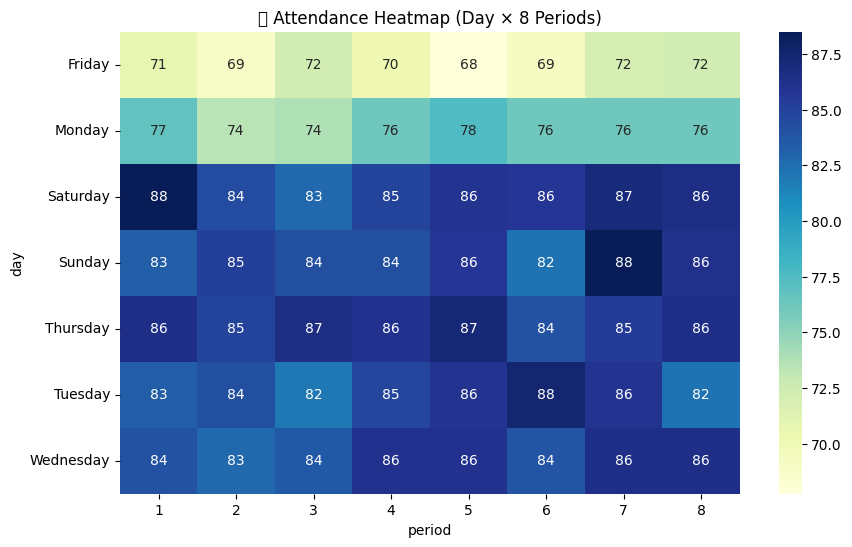

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.pivot_table(
    index="day",
    columns="period",
    values="status",
    aggfunc=lambda x: (x=="present").mean()*100
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("📘 Attendance Heatmap (Day × 8 Periods)")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


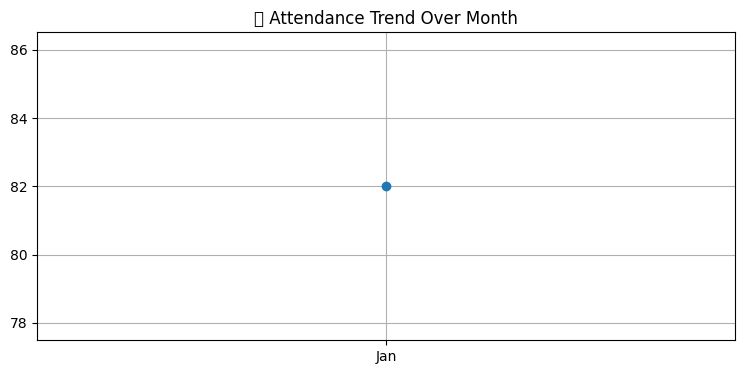

In [ ]:
df["month"] = df["date"].dt.strftime("%b")

trend = df.groupby("month")["status"].apply(lambda x: (x=="present").mean()*100)

plt.figure(figsize=(9,4))
plt.plot(trend.index, trend.values, marker='o', linewidth=4)
plt.title("📈 Attendance Trend Over Month")
plt.grid(True)
plt.show()


In [ ]:
low10 = student_attendance.sort_values().head(10)
low10


,status
student_id,
S1094,76.250000
S1020,76.666667
S1046,77.083333
S1074,77.500000
S1070,77.916667
S1076,78.333333
S1033,78.750000
S1009,78.750000
S1040,78.750000


In [ ]:
def student_report(sid):
    att = student_attendance[sid]
    risk = risk_scores[sid]
    pred = predicted[sid]

    print(f"\n================= REPORT FOR {sid} =================")
    print("Attendance %:", round(att,2))
    print("Risk Score  :", risk)
    print("Predicted Next Month:", pred)

    if risk > 70:
        print("⚠ HIGH RISK STUDENT — Needs counselling")
    elif risk > 40:
        print("🔶 MEDIUM RISK STUDENT — Monitor weekly")
    else:
        print("🟢 SAFE STUDENT — Normal pattern")

    sdf = df[df["student_id"]==sid]
    fri = (sdf[sdf["day"]=="Friday"]["status"]=="absent").mean()
    if fri > 0.40:
        print("⚠ Pattern: Friday Bunk Detected")

    print("======================================================")

# Example
for sid in list(df["student_id"].unique())[:5]:
    student_report(sid)



================= REPORT FOR S1000 =================
Attendance %: 84.58
Risk Score  : 20.42
Predicted Next Month: 92.5
🟢 SAFE STUDENT — Normal pattern

================= REPORT FOR S1001 =================
Attendance %: 80.0
Risk Score  : 20.0
Predicted Next Month: 85.0
🟢 SAFE STUDENT — Normal pattern

================= REPORT FOR S1002 =================
Attendance %: 80.83
Risk Score  : 24.17
Predicted Next Month: 82.5
🟢 SAFE STUDENT — Normal pattern

================= REPORT FOR S1003 =================
Attendance %: 82.5
Risk Score  : 22.5
Predicted Next Month: 92.5
🟢 SAFE STUDENT — Normal pattern

================= REPORT FOR S1004 =================
Attendance %: 80.0
Risk Score  : 25.0
Predicted Next Month: 95.0
🟢 SAFE STUDENT — Normal pattern


In [ ]:
faculty_late = df.groupby("faculty_id")["late"].apply(lambda x: (x=='yes').mean()*100)

faculty_reliability = (
    faculty_attendance*0.7 +
    (100 - faculty_late)*0.3
).round(2)

faculty_reliability


,0
faculty_id,
F200,83.14
F201,82.17
F202,82.62
F203,83.01
F204,83.35
F205,82.71
F206,83.68
F207,83.37


In [ ]:
def faculty_report(fid):
    print(f"\n======= FACULTY REPORT — {fid} =======")
    print("Attendance %:", round(faculty_attendance[fid],2))
    print("Late Rate   :", round(faculty_late[fid],2))
    print("Reliability :", faculty_reliability[fid])

    if faculty_reliability[fid] < 60:
        print("⚠ Needs Attention")
    elif faculty_reliability[fid] < 80:
        print("🔶 Moderate Performance")
    else:
        print("🟢 Good & Reliable")

# Example
for fid in faculty_attendance.index[:5]:
    faculty_report(fid)



======= FACULTY REPORT — F200 =======
Attendance %: 82.07
Late Rate   : 14.37
Reliability : 83.14
🟢 Good & Reliable

======= FACULTY REPORT — F201 =======
Attendance %: 80.83
Late Rate   : 14.7
Reliability : 82.17
🟢 Good & Reliable

======= FACULTY REPORT — F202 =======
Attendance %: 81.03
Late Rate   : 13.67
Reliability : 82.62
🟢 Good & Reliable

======= FACULTY REPORT — F203 =======
Attendance %: 82.13
Late Rate   : 14.93
Reliability : 83.01
🟢 Good & Reliable

======= FACULTY REPORT — F204 =======
Attendance %: 82.63
Late Rate   : 14.97
Reliability : 83.35
🟢 Good & Reliable
